In [14]:
from Tool_Functions import *

In [2]:
np.random.seed(42)

In [3]:
beta2_values = np.linspace(0, 0.16, 9)

In [15]:
esperances2000, variances2000, test_statistics2000, test_alternative2000, power2000 = power_simulation(150, 2000, 1000)
esperances150, variances150, test_statistics150, test_alternative150, power150 = power_simulation(150, 150, 1000)
esperancesC, variancesC, test_statisticsC, test_alternativeC, powerC = power_competition(n=150, B=250)
esperancesOOB, variancesOOB, test_statisticsOOB, test_alternativeOOB, power = power_RW_OOB(n=150, B=250)
esperances_CV, variances_CV, test_statistics_CV, test_alternative_CV, power_CV = power_RW_CV(n=150, B=250)
esperances_OBB2n, variances_OBB2n, test_statistics_OBB2n, test_alternative_OBB2n, power_OBB2n = power_RW_OOB_2n(n=150, B=250, m=150)

In [16]:
real_data = {
    "β₂": [0.000, 0.020, 0.040, 0.060, 0.080, 0.100, 0.120, 0.140, 0.160],
    "Simulation m=2000": [0.000, 0.029, 0.835, 0.997, 1.000, 1.000, 1.000, 1.000, 1.000],
    "Simulation m=150": [0.000, 0.287, 0.609, 0.764, 0.875, 0.933, 0.971, 0.988, 0.997],
    "Competition OOB": [0.072, 0.186, 0.451, 0.683, 0.833, 0.912, 0.953, 0.981, 0.990],
    "Real World OOB": [0.054, 0.114, 0.297, 0.554, 0.778, 0.925, 0.984, 0.996, 1.000],
    "Real World OOB-2n": [0.059, 0.174, 0.499, 0.840, 0.973, 0.997, 1.000, 1.000, 1.000],
    "Real World CV": [0.054, 0.109, 0.279, 0.523, 0.777, 0.926, 0.978, 0.996, 1.000]
}

real_df = pd.DataFrame(real_data)
real_df

,β₂,Simulation m=2000,Simulation m=150,Competition OOB,Real World OOB,Real World OOB-2n,Real World CV
0,0.00,0.000,0.000,0.072,0.054,0.059,0.054
1,0.02,0.029,0.287,0.186,0.114,0.174,0.109
2,0.04,0.835,0.609,0.451,0.297,0.499,0.279
3,0.06,0.997,0.764,0.683,0.554,0.840,0.523
4,0.08,1.000,0.875,0.833,0.778,0.973,0.777
5,0.10,1.000,0.933,0.912,0.925,0.997,0.926
6,0.12,1.000,0.971,0.953,0.984,1.000,0.978
7,0.14,1.000,0.988,0.981,0.996,1.000,0.996
8,0.16,1.000,0.997,0.990,1.000,1.000,1.000


In [24]:
exp_data = {
    "β₂": [0.000, 0.020, 0.040, 0.060, 0.080, 0.100, 0.120, 0.140, 0.160],
    "Simulation m =2000" : power2000,
    "Simulation m =150" : power150,
    "Competition": powerC,
    "RW OOB": power,
    "RW OOB 2n" : power_OBB2n,
    "RW CV": power_CV
}

exp_df = pd.DataFrame(exp_data)
exp_df

,β₂,Simulation m =2000,Simulation m =150,Competition,RW OOB,RW OOB 2n,RW CV
0,0.00,0.000000e+00,0.000000,4.054534e-13,0.000000e+00,0.000000,0.000000
1,0.02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
2,0.04,3.593376e-07,0.000411,0.000000e+00,2.906182e-10,0.000000,0.007339
3,0.06,1.000000e+00,1.000000,0.000000e+00,1.041017e-01,0.000000,0.999978
4,0.08,1.000000e+00,1.000000,0.000000e+00,9.998145e-01,0.000195,1.000000
5,0.10,1.000000e+00,1.000000,4.800610e-05,1.000000e+00,0.996479,1.000000
6,0.12,1.000000e+00,1.000000,9.999994e-01,1.000000e+00,1.000000,1.000000
7,0.14,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000
8,0.16,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000


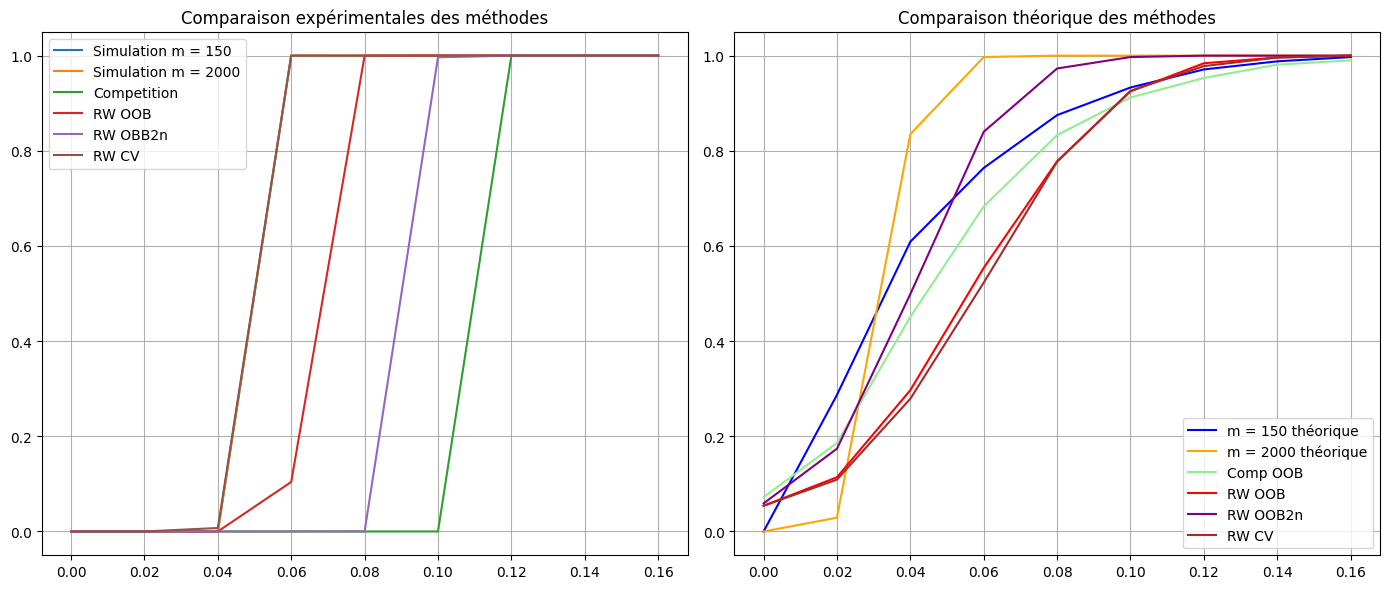

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Premier graphique
ax1.set_title("Comparaison expérimentales des méthodes")
ax1.plot(beta2_values, power150, label="Simulation m = 150")
ax1.plot(beta2_values, power2000, label="Simulation m = 2000")
ax1.plot(beta2_values, powerC, label="Competition")
ax1.plot(beta2_values, power, label="RW OOB")
ax1.plot(beta2_values, power_OBB2n, label="RW OBB2n")
ax1.plot(beta2_values, power_CV, label="RW CV")
ax1.legend()
ax1.grid(True)

# Deuxième graphique
ax2.set_title("Comparaison théorique des méthodes")
ax2.plot(beta2_values, real_df["Simulation m=150"], label="m = 150 théorique", color="blue")
ax2.plot(beta2_values, real_df["Simulation m=2000"], label="m = 2000 théorique", color="orange")
ax2.plot(beta2_values, real_df["Competition OOB"], label="Comp OOB", color="lightgreen")
ax2.plot(beta2_values, real_df["Real World OOB"], label="RW OOB", color="red")
ax2.plot(beta2_values, real_df["Real World OOB-2n"], label="RW OOB2n", color="purple")
ax2.plot(beta2_values, real_df["Real World CV"], label="RW CV", color="brown")
ax2.grid(True)
ax2.legend()

# Affichage de la figure
plt.tight_layout()
plt.show()

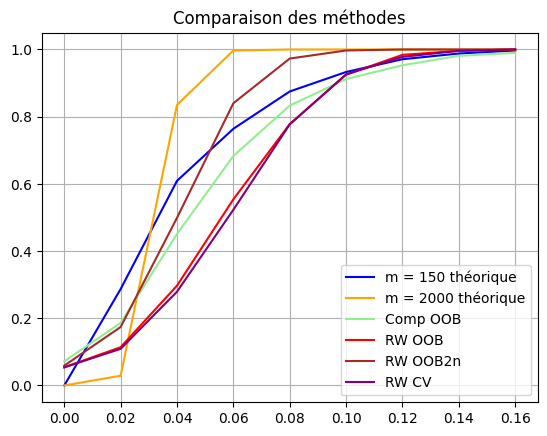

In [8]:
plt.figure()
plt.title("Comparaison des méthodes")
plt.plot(beta2_values, real_df["Simulation m=150"], label = "m = 150 théorique", color = "blue")
plt.plot(beta2_values, real_df["Simulation m=2000"], label = "m = 2000 théorique", color = "orange")
plt.plot(beta2_values, real_df["Competition OOB"], label = "Comp OOB", color = "lightgreen")
plt.plot(beta2_values, real_df["Real World OOB"], label = "RW OOB", color = "red")
plt.plot(beta2_values, real_df["Real World OOB-2n"], label = "RW OOB2n", color = "purple")
plt.plot(beta2_values, real_df["Real World CV"], label = "RW CV", color = "brown")
plt.grid()
plt.legend()
plt.show()